In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define the list of assets to include in the portfolio
assets = ['AAPL', 'MSFT', 'GOOGL', 'JNJ', 'TLT', 'GLD', 'VNQ']  # Tech, Healthcare, Bonds, Gold, Real Estate
start_date = '2000-01-01'
end_date = '2023-01-01'

# Download the data
data = yf.download(assets, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

[*********************100%%**********************]  7 of 7 completed


In [2]:
# Equal weight allocation (for simplicity)
weights = np.array([1/len(assets)] * len(assets))

# Portfolio return and risk calculation
portfolio_return = np.dot(returns.mean(), weights) * 252
portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

print(f'Expected annual return: {portfolio_return}')
print(f'Annual volatility (risk): {portfolio_std_dev}')


Expected annual return: 0.15395132710901835
Annual volatility (risk): 0.1500900482215853


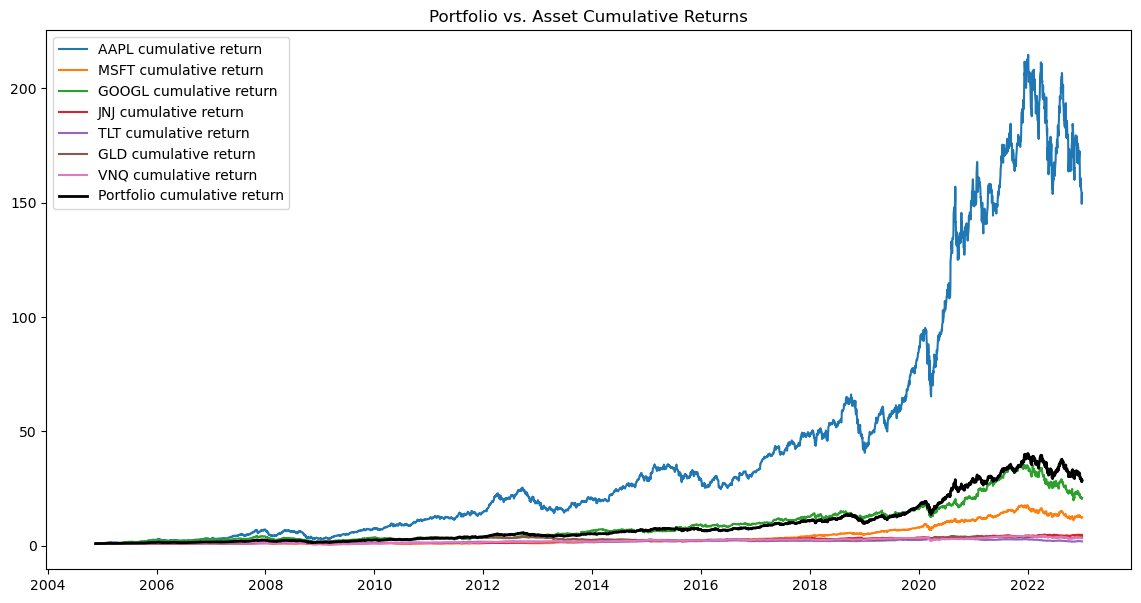

In [3]:
# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod()

# Calculate portfolio cumulative returns
portfolio_cumulative_returns = (cumulative_returns * weights).sum(axis=1)

# Plot the performance of the portfolio vs individual assets
plt.figure(figsize=(14, 7))
for asset in assets:
    plt.plot(cumulative_returns[asset], label=f'{asset} cumulative return')
plt.plot(portfolio_cumulative_returns, label='Portfolio cumulative return', color='black', linewidth=2)
plt.title('Portfolio vs. Asset Cumulative Returns')
plt.legend()
plt.show()


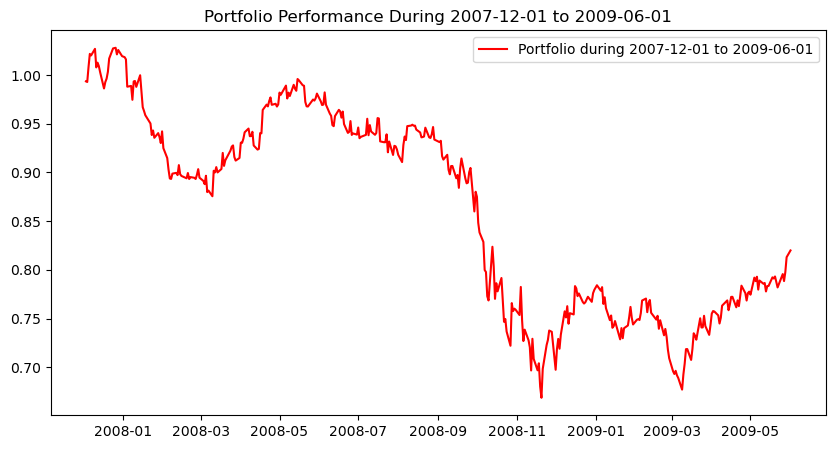

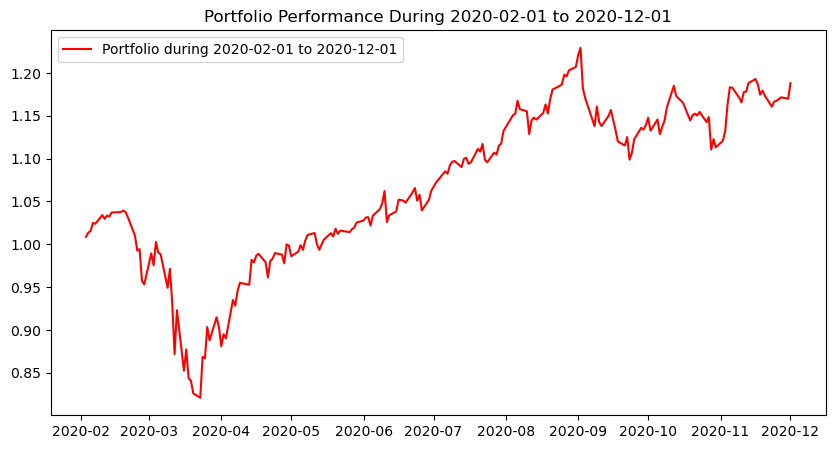

In [4]:
# Define recession periods (example: 2008 financial crisis, COVID-19 pandemic)
recession_periods = [
    ('2007-12-01', '2009-06-01'),  # 2008 Financial Crisis
    ('2020-02-01', '2020-12-01')   # COVID-19 Pandemic
]

# Evaluate performance during recession periods
for start, end in recession_periods:
    recession_data = returns.loc[start:end]
    recession_portfolio_cumulative = (1 + recession_data).cumprod().dot(weights)
    
    plt.figure(figsize=(10, 5))
    plt.plot(recession_portfolio_cumulative, label=f'Portfolio during {start} to {end}', color='red')
    plt.title(f'Portfolio Performance During {start} to {end}')
    plt.legend()
    plt.show()


In [5]:
# Calculate the Sharpe ratio
risk_free_rate = 0.01
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

print(f'Sharpe Ratio: {sharpe_ratio}')


Sharpe Ratio: 0.9590997458838572
